<a href="https://colab.research.google.com/github/ChallaAashritha/zeotapassignment/blob/main/FirstName_LastName_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [ ]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')

In [ ]:
# Total spending per customer
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending.rename(columns={'TotalValue': 'TotalSpending'}, inplace=True)

# Transaction frequency per customer
customer_frequency = merged_data.groupby('CustomerID')['TransactionID'].count().reset_index()
customer_frequency.rename(columns={'TransactionID': 'TransactionFrequency'}, inplace=True)

# Average transaction value
customer_avg_transaction = merged_data.groupby('CustomerID')['TotalValue'].mean().reset_index()
customer_avg_transaction.rename(columns={'TotalValue': 'AvgTransactionValue'}, inplace=True)


customer_features = customers.merge(customer_spending, on='CustomerID', how='left')
customer_features = customer_features.merge(customer_frequency, on='CustomerID', how='left')
customer_features = customer_features.merge(customer_avg_transaction, on='CustomerID', how='left')

In [ ]:
customer_features.fillna({'TotalSpending': 0, 'TransactionFrequency': 0, 'AvgTransactionValue': 0}, inplace=True)
# One-hot encoding
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)
data_for_clustering = customer_features.drop(['CustomerID', 'CustomerName', 'SignupDate'], axis=1)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

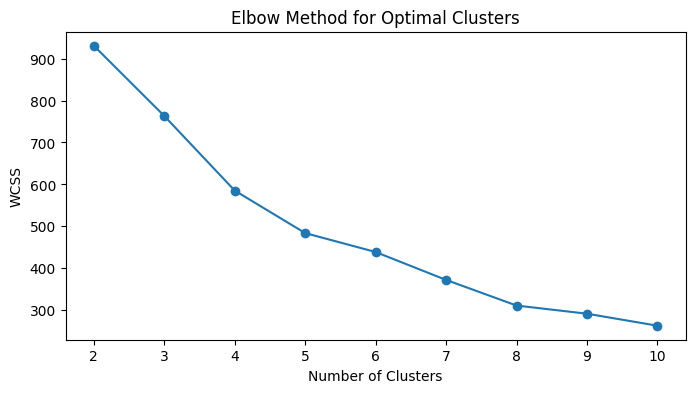

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Choose the optimal number of clusters (e.g., 4 based on elbow)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(data_scaled)
# Add cluster labels to the original dataframe
customer_features['Cluster'] = labels
# Evaluate Clustering
db_index = davies_bouldin_score(data_scaled, labels)
sil_score = silhouette_score(data_scaled, labels)
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {sil_score}")

Davies-Bouldin Index: 1.1926430643192663
Silhouette Score: 0.31973356884457993


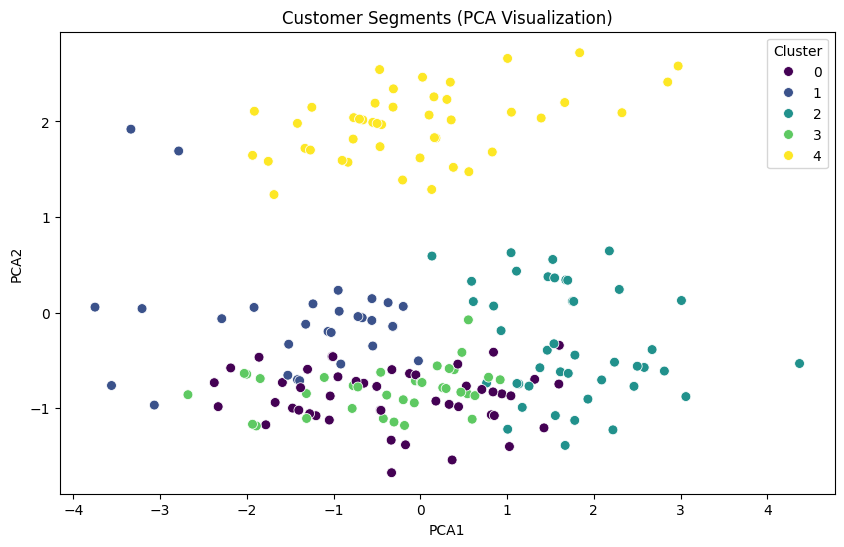

In [16]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
customer_features['PCA1'] = pca_result[:, 0]
customer_features['PCA2'] = pca_result[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=customer_features,
    palette='viridis',
    s=50
)
plt.title('Customer Segments (PCA Visualization)')
plt.show()